In [1]:
# Step 1: Import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set a visual style for our plots
sns.set_style('darkgrid')

# Step 2: Load the dataset using the file path you provided
# We use an 'r' before the string to handle the backslashes in the Windows path correctly
file_path = r"C:\Users\thist\Downloads\Subscription_Service_Churn_Dataset.csv"
df = pd.read_csv(file_path)

# Step 3: Perform the initial inspection of the data
print("--- First 5 Rows ---")
display(df.head())

print("\n--- Data Types and Missing Values ---")
df.info()

print("\n--- Statistical Summary for Numerical Columns ---")
display(df.describe())

print(f"\n--- Dataset Shape (Rows, Columns) ---")
print(df.shape)

--- First 5 Rows ---


,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,...,ContentDownloadsPerMonth,GenrePreference,UserRating,SupportTicketsPerMonth,Gender,WatchlistSize,ParentalControl,SubtitlesEnabled,CustomerID,Churn
0,42,11.321950,475.521914,Basic,Electronic check,Yes,Movies,Yes,Tablet,0.386852,...,25,Comedy,3.489465,7,Female,15,No,No,LOHRYYC9E8,0
1,95,12.810915,1217.036887,Standard,Electronic check,Yes,TV Shows,No,Mobile,37.123000,...,21,Comedy,2.251860,3,Male,8,No,NaN,RIH7RFEZCS,0
2,6,NaN,91.583304,Standard,Credit card,Yes,TV Shows,No,Tablet,30.716944,...,29,Fantasy,NaN,4,Male,14,No,Yes,JB5J8X2UY1,1
3,54,17.917819,967.562224,Basic,NaN,Yes,Movies,No,Mobile,2.495373,...,45,Drama,1.275004,3,Male,12,No,NaN,Z4GZJIB90P,0
4,27,NaN,339.057244,Basic,Mailed check,No,TV Shows,No,Mobile,39.936910,...,44,Comedy,3.236230,4,Female,18,No,NaN,B3BDJTW0L9,0



--- Data Types and Missing Values ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 963 entries, 0 to 962
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   AccountAge                963 non-null    int64  
 1   MonthlyCharges            759 non-null    float64
 2   TotalCharges              777 non-null    float64
 3   SubscriptionType          913 non-null    object 
 4   PaymentMethod             740 non-null    object 
 5   PaperlessBilling          963 non-null    object 
 6   ContentType               963 non-null    object 
 7   MultiDeviceAccess         963 non-null    object 
 8   DeviceRegistered          887 non-null    object 
 9   ViewingHoursPerWeek       963 non-null    float64
 10  AverageViewingDuration    963 non-null    float64
 11  ContentDownloadsPerMonth  963 non-null    int64  
 12  GenrePreference           853 non-null    object 
 13  UserRating                

,AccountAge,MonthlyCharges,TotalCharges,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,UserRating,SupportTicketsPerMonth,WatchlistSize,Churn
count,963.000000,759.000000,777.000000,963.000000,963.000000,963.000000,702.000000,963.000000,963.000000,963.000000
mean,57.515057,12.328262,714.052121,21.029241,90.741877,24.694704,2.923945,4.455867,11.900312,0.175493
std,33.662575,4.260861,511.071322,11.318164,49.923719,14.319572,1.165992,2.935706,7.117402,0.380586
min,1.000000,5.062339,11.582882,0.315317,5.028412,0.000000,1.000181,0.000000,0.000000,0.000000
25%,29.000000,8.816669,318.425396,11.621961,47.777701,13.000000,1.922235,2.000000,6.000000,0.000000
50%,55.000000,12.169888,614.196606,21.334100,89.878241,25.000000,2.898328,5.000000,12.000000,0.000000
75%,86.000000,15.937606,1021.436452,30.419851,134.353824,37.000000,3.953953,7.000000,18.000000,0.000000
max,119.000000,19.932542,2261.019201,39.949086,179.752024,49.000000,4.997348,9.000000,24.000000,1.000000



--- Dataset Shape (Rows, Columns) ---
(963, 21)


In [2]:
# Create a copy of the dataframe to ensure our original data is safe
df_cleaned = df.copy()

# --- Step 1: Handle Numerical Missing Values ---
# We will fill the missing values with the median of each column
numerical_cols_with_nan = ['MonthlyCharges', 'TotalCharges', 'UserRating']
for col in numerical_cols_with_nan:
    median_val = df_cleaned[col].median()
    df_cleaned[col].fillna(median_val, inplace=True)
    print(f"Filled missing values in '{col}' with median: {median_val:.2f}")

# --- Step 2: Handle Categorical Missing Values ---
# We will fill the missing values with the mode (most frequent value) of each column
categorical_cols_with_nan = ['SubscriptionType', 'PaymentMethod', 'DeviceRegistered', 'GenrePreference', 'Gender']
for col in categorical_cols_with_nan:
    mode_val = df_cleaned[col].mode()[0]
    df_cleaned[col].fillna(mode_val, inplace=True)
    print(f"Filled missing values in '{col}' with mode: '{mode_val}'")

# --- Step 3: Handle the Special Case Column ---
# We will drop the 'SubtitlesEnabled' column because it has too much missing data
df_cleaned.drop(columns=['SubtitlesEnabled'], inplace=True)
print("\nDropped 'SubtitlesEnabled' column.")

# --- Step 4: Verification ---
# Let's run .info() again to confirm that all missing values are handled
print("\n--- Verification: Cleaned DataFrame Info ---")
df_cleaned.info()

Filled missing values in 'MonthlyCharges' with median: 12.17
Filled missing values in 'TotalCharges' with median: 614.20
Filled missing values in 'UserRating' with median: 2.90
Filled missing values in 'SubscriptionType' with mode: 'Premium'
Filled missing values in 'PaymentMethod' with mode: 'Credit card'
Filled missing values in 'DeviceRegistered' with mode: 'Mobile'
Filled missing values in 'GenrePreference' with mode: 'Comedy'
Filled missing values in 'Gender' with mode: 'Male'

Dropped 'SubtitlesEnabled' column.

--- Verification: Cleaned DataFrame Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 963 entries, 0 to 962
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   AccountAge                963 non-null    int64  
 1   MonthlyCharges            963 non-null    float64
 2   TotalCharges              963 non-null    float64
 3   SubscriptionType          963 non-null    obje

Overall Churn Rate:
Churn
0    82.45
1    17.55
Name: proportion, dtype: float64


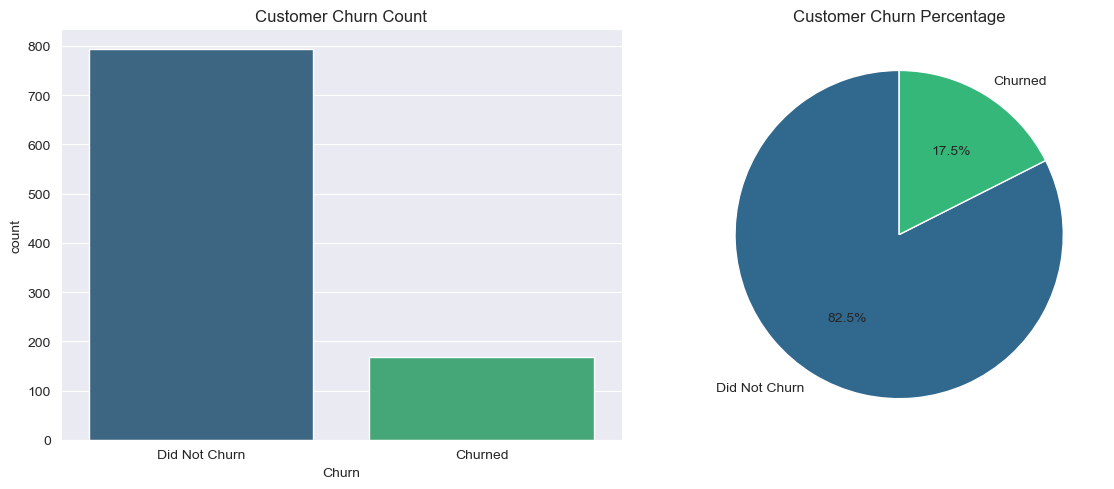

In [3]:
# --- Step 1: Calculate and Print the Churn Rate ---
churn_rate = df_cleaned['Churn'].value_counts(normalize=True) * 100
print(f"Overall Churn Rate:\n{churn_rate.round(2)}")

# --- Step 2: Create the Visualizations ---
# Set up the figure for two plots side-by-side
plt.figure(figsize=(12, 5))

# Plot 1: Bar Chart (Count Plot)
plt.subplot(1, 2, 1) # (1 row, 2 columns, 1st plot)
sns.countplot(x='Churn', data=df_cleaned, palette='viridis')
plt.title('Customer Churn Count')
plt.xticks([0, 1], ['Did Not Churn', 'Churned']) # Make labels more readable

# Plot 2: Pie Chart
plt.subplot(1, 2, 2) # (1 row, 2 columns, 2nd plot)
churn_counts = df_cleaned['Churn'].value_counts()
plt.pie(churn_counts, labels=['Did Not Churn', 'Churned'], autopct='%1.1f%%',
        startangle=90, colors=sns.color_palette('viridis', 2))
plt.title('Customer Churn Percentage')
plt.ylabel('') # Hide the 'Churn' label on the y-axis for the pie chart

# Display the plots
plt.tight_layout()
plt.show()

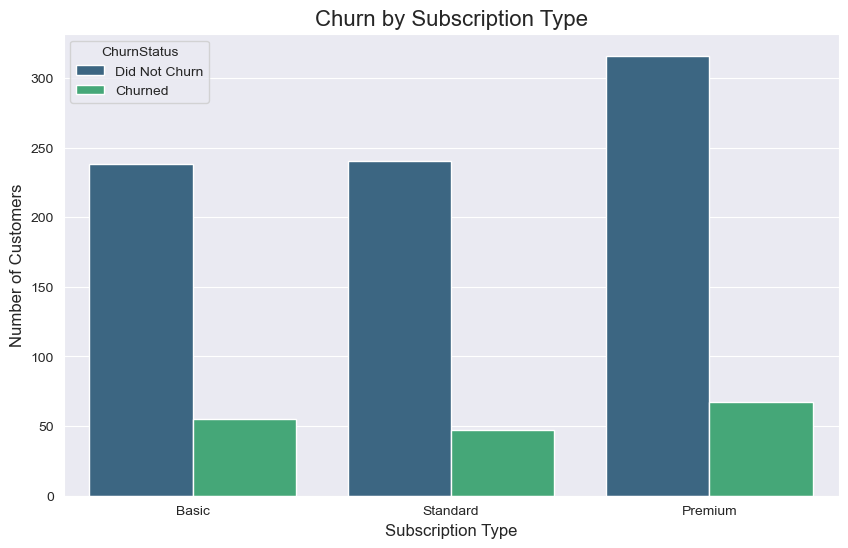

In [5]:
# Create a new, more descriptive column for churn status
df_cleaned['ChurnStatus'] = df_cleaned['Churn'].map({0: 'Did Not Churn', 1: 'Churned'})

# Set the figure size for better readability
plt.figure(figsize=(10, 6))

# Create the count plot using our new 'ChurnStatus' column
# Seaborn will now automatically create the correct legend for us
sns.countplot(x='SubscriptionType', hue='ChurnStatus', data=df_cleaned, palette='viridis')

# Add titles and labels for clarity
plt.title('Churn by Subscription Type', fontsize=16)
plt.xlabel('Subscription Type', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)

# Display the plot
plt.show()

Churn Rate by Subscription Type (%):
SubscriptionType
Basic       18.77
Premium     17.49
Standard    16.38
Name: Churn, dtype: float64


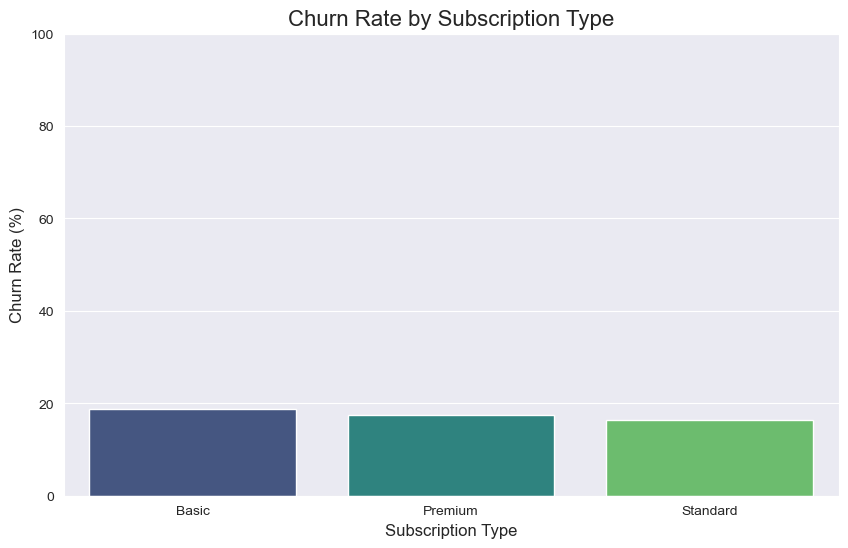

In [6]:
# --- Step 1: Calculate Churn Rate per Subscription Type ---
# Group by 'SubscriptionType' and calculate the mean of the 'Churn' column
# Since Churn is 1 for churned and 0 for not, the mean is the churn rate.
churn_rate_by_sub = df_cleaned.groupby('SubscriptionType')['Churn'].mean() * 100

# Print the result to see the exact percentages
print("Churn Rate by Subscription Type (%):")
print(churn_rate_by_sub.round(2))

# --- Step 2: Visualize the Churn Rate ---
plt.figure(figsize=(10, 6))

# Create a bar plot from our calculated data
sns.barplot(x=churn_rate_by_sub.index, y=churn_rate_by_sub.values, palette='viridis')

# Add titles and labels for clarity
plt.title('Churn Rate by Subscription Type', fontsize=16)
plt.xlabel('Subscription Type', fontsize=12)
plt.ylabel('Churn Rate (%)', fontsize=12)
plt.ylim(0, 100) # Set y-axis to be from 0 to 100 percent

# Display the plot
plt.show()

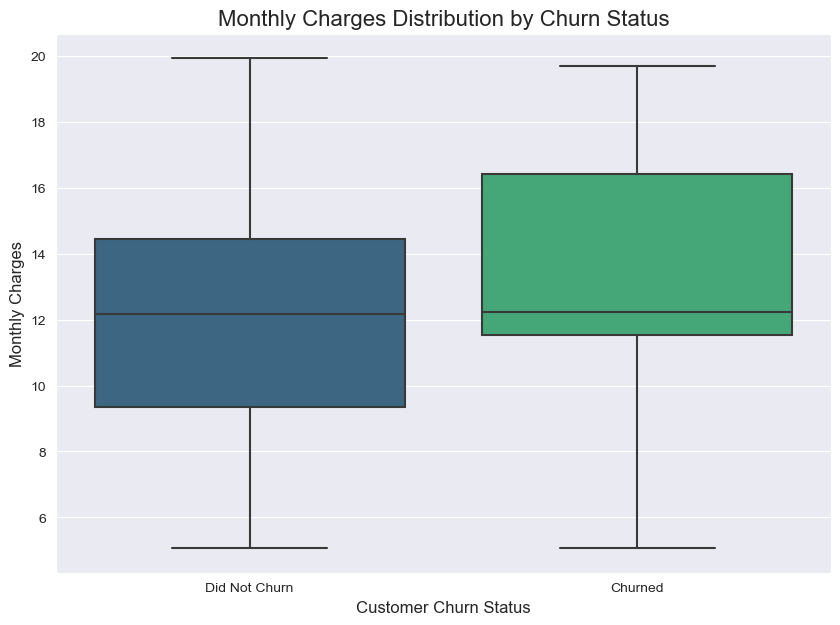

In [7]:
# Set the figure size
plt.figure(figsize=(10, 7))

# Create a box plot to compare MonthlyCharges for churned vs. non-churned customers
sns.boxplot(x='ChurnStatus', y='MonthlyCharges', data=df_cleaned, palette='viridis')

# Add titles and labels for clarity
plt.title('Monthly Charges Distribution by Churn Status', fontsize=16)
plt.xlabel('Customer Churn Status', fontsize=12)
plt.ylabel('Monthly Charges', fontsize=12)

# Display the plot
plt.show()

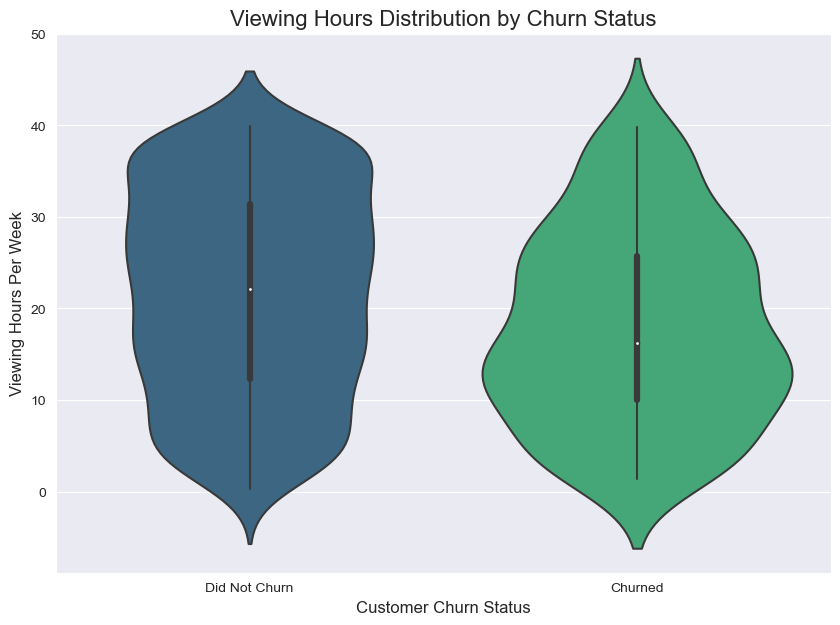

In [8]:
# Set the figure size
plt.figure(figsize=(10, 7))

# Create a violin plot to compare ViewingHoursPerWeek for each churn status
sns.violinplot(x='ChurnStatus', y='ViewingHoursPerWeek', data=df_cleaned, palette='viridis')

# Add titles and labels for clarity
plt.title('Viewing Hours Distribution by Churn Status', fontsize=16)
plt.xlabel('Customer Churn Status', fontsize=12)
plt.ylabel('Viewing Hours Per Week', fontsize=12)

# Display the plot
plt.show()

In [9]:
# --- Step 1: Select Features for the Model ---
# We'll drop CustomerID (it's just an identifier) and the descriptive ChurnStatus column
X = df_cleaned.drop(columns=['CustomerID', 'Churn', 'ChurnStatus'])
y = df_cleaned['Churn'] # Our target variable

# --- Step 2: One-Hot Encode Categorical Features ---
# pandas.get_dummies will automatically find and convert object/category columns
X_encoded = pd.get_dummies(X, drop_first=True)

# --- Step 3: Display the Results ---
print("--- Shape of our features (X) before encoding ---")
print(X.shape)

print("\n--- Shape of our features (X) after encoding ---")
print(X_encoded.shape)

print("\n--- First 5 rows of the new, encoded feature set ---")
display(X_encoded.head())

--- Shape of our features (X) before encoding ---
(963, 18)

--- Shape of our features (X) after encoding ---
(963, 27)

--- First 5 rows of the new, encoded feature set ---


,AccountAge,MonthlyCharges,TotalCharges,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,UserRating,SupportTicketsPerMonth,WatchlistSize,SubscriptionType_Premium,...,MultiDeviceAccess_Yes,DeviceRegistered_Mobile,DeviceRegistered_TV,DeviceRegistered_Tablet,GenrePreference_Comedy,GenrePreference_Drama,GenrePreference_Fantasy,GenrePreference_Sci-Fi,Gender_Male,ParentalControl_Yes
0,42,11.321950,475.521914,0.386852,24.593361,25,3.489465,7,15,False,...,True,False,False,True,True,False,False,False,False,False
1,95,12.810915,1217.036887,37.123000,102.860795,21,2.251860,3,8,False,...,False,True,False,False,True,False,False,False,True,False
2,6,12.169888,91.583304,30.716944,10.512415,29,2.898328,4,14,False,...,False,False,False,True,False,False,True,False,True,False
3,54,17.917819,967.562224,2.495373,45.246834,45,1.275004,3,12,False,...,False,True,False,False,False,True,False,False,True,False
4,27,12.169888,339.057244,39.936910,94.310954,44,3.236230,4,18,False,...,False,True,False,False,True,False,False,False,False,False


In [10]:
# Import the necessary functions from scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# --- Step 1: Split the Data into Training and Testing Sets ---
# We'll use an 80/20 split and set a random_state for reproducibility
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42
)

print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")

# --- Step 2: Initialize and Train the Logistic Regression Model ---
# We create an instance of the model
log_reg_model = LogisticRegression(max_iter=1000) # Increased max_iter for convergence

# The model 'learns' from the training data in this step
log_reg_model.fit(X_train, y_train)

print("\nLogistic Regression model has been successfully trained!")

# --- Step 3: Make Predictions on the Test Set ---
# Now we use our trained model to predict churn on the unseen test data
y_pred = log_reg_model.predict(X_test)

# --- Step 4: Evaluate the Model's Performance ---
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy on the Test Set: {accuracy * 100:.2f}%")

Training data shape: (770, 27)
Testing data shape: (193, 27)

Logistic Regression model has been successfully trained!

Model Accuracy on the Test Set: 80.83%


--- Classification Report ---
               precision    recall  f1-score   support

Did Not Churn       0.82      0.97      0.89       153
      Churned       0.64      0.17      0.27        40

     accuracy                           0.81       193
    macro avg       0.73      0.57      0.58       193
 weighted avg       0.78      0.81      0.76       193


--- Confusion Matrix ---


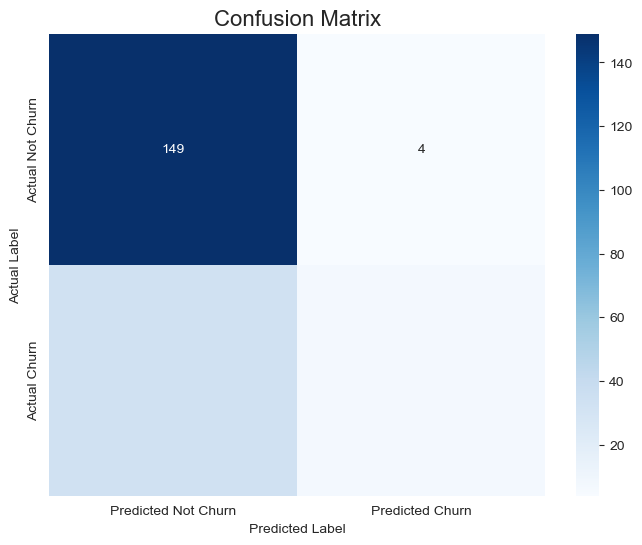

In [11]:
# Import the necessary functions
from sklearn.metrics import classification_report, confusion_matrix

# --- Step 1: Generate the Classification Report ---
print("--- Classification Report ---")
# This report shows precision, recall, and f1-score for each class (Churned vs. Not Churned)
print(classification_report(y_test, y_pred, target_names=['Did Not Churn', 'Churned']))

# --- Step 2: Generate and Visualize the Confusion Matrix ---
print("\n--- Confusion Matrix ---")
cm = confusion_matrix(y_test, y_pred)

# Use seaborn to create a heatmap for better visualization
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Not Churn', 'Predicted Churn'],
            yticklabels=['Actual Not Churn', 'Actual Churn'])
plt.title('Confusion Matrix', fontsize=16)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

--- Data Shape Before SMOTE ---
Churn
0    641
1    129
Name: count, dtype: int64

--- Data Shape After SMOTE ---
Churn
1    641
0    641
Name: count, dtype: int64

Random Forest model has been successfully trained!

--- New Classification Report (Random Forest + SMOTE) ---
               precision    recall  f1-score   support

Did Not Churn       0.84      0.90      0.87       153
      Churned       0.46      0.33      0.38        40

     accuracy                           0.78       193
    macro avg       0.65      0.61      0.63       193
 weighted avg       0.76      0.78      0.77       193


--- New Confusion Matrix ---


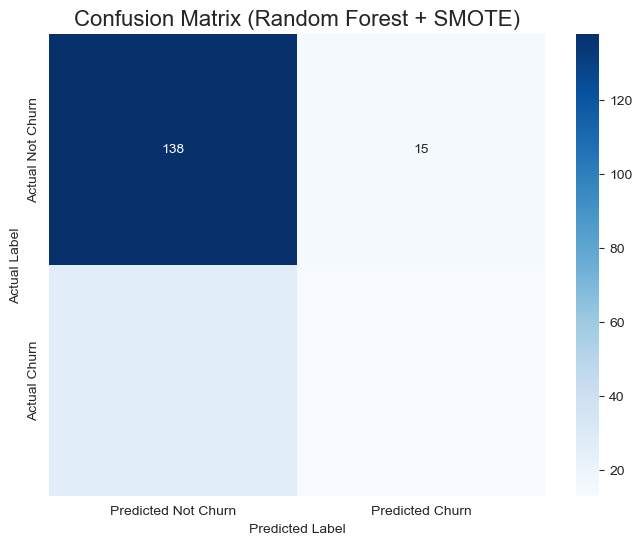

In [12]:
# Import the necessary functions and models
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

# --- Step 1: Apply SMOTE to the Training Data ---
# Note: We only apply SMOTE to the training set, never the test set.
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("--- Data Shape Before SMOTE ---")
print(y_train.value_counts())

print("\n--- Data Shape After SMOTE ---")
print(y_train_resampled.value_counts())


# --- Step 2: Train the Random Forest Classifier ---
# We'll use the new, resampled data for training
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_resampled, y_train_resampled)

print("\nRandom Forest model has been successfully trained!")


# --- Step 3: Evaluate the New Model on the Original Test Set ---
y_pred_rf = rf_model.predict(X_test)

print("\n--- New Classification Report (Random Forest + SMOTE) ---")
print(classification_report(y_test, y_pred_rf, target_names=['Did Not Churn', 'Churned']))

# --- Step 4: Visualize the New Confusion Matrix ---
print("\n--- New Confusion Matrix ---")
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Not Churn', 'Predicted Churn'],
            yticklabels=['Actual Not Churn', 'Actual Churn'])
plt.title('Confusion Matrix (Random Forest + SMOTE)', fontsize=16)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

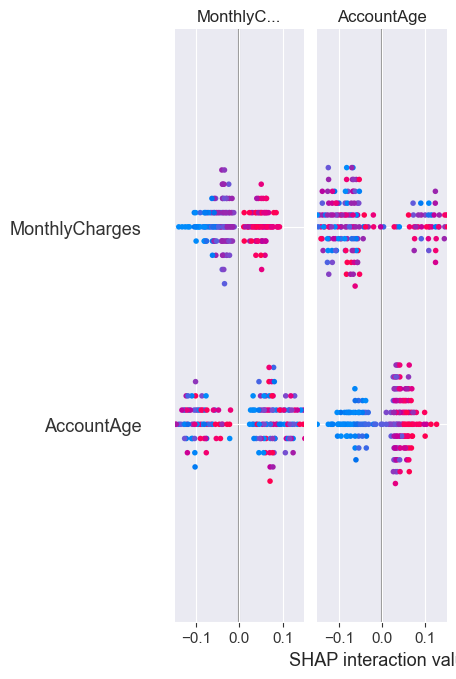

In [21]:
import shap
import matplotlib.pyplot as plt

# This assumes 'shap_values', 'X_test' are still loaded in your notebook.

# We select the SHAP values for the "churned" class (index 1)
if isinstance(shap_values, list):
    shap_values_for_churn = shap_values[1]
else:
    shap_values_for_churn = shap_values

# --- Code for a High-Quality Plot ---

# 1. Create the plot object but don't show it yet
shap.summary_plot(shap_values_for_churn, X_test, show=False)

# 2. Save the current plot to a file with high resolution
#    dpi=300 is a good standard for quality.
plt.savefig('shap_summary_plot.png', dpi=300, bbox_inches='tight')

# 3. Now, display the plot in your notebook
plt.show()